---
title: "Clustering"
format: html
---

Clustering my data may reveal if certain states or years may be grouped together. This can reveal trends in my data set, like if certain regions are developing in similar ways.

# KMEAN

K-means Clustering separates an unlabeled dataset into distinct clusters. In this method, the parameter K signifies the predetermined number of clusters to be formed during the process, or another way to say it, the number of centroids (means).For instance, if K=2, the data will be grouped into two clusters, and if K=3, there will be three clusters and three centroids, ect. Every data point is then assigned to each of the clusters to reduce the in-cluster sum of squares<br>
<br>
The process goes as follows. First you initialize the number of random centroids. You can determine this figure with model selection methods which I will talk about below. Then, you compute the distance from each data point to each centroid and assign the point to the nearest centroid. Then, you compute the centroids as the mean points of the cluster and repeat computing distance, reassigning points, recomputing centroids until convergence.


# DBSAN

While K-means clustering is better for normal shaped data, density based clustering is more efficient for oddly shaped data. The underlying concept is that a cluster in the data space is characterized by a region with high point density, and it is separated from other clusters by regions with low point density. The two parameters required for DBSCAN are epsilon and minimum points, where epsilon is basically the maximum distance from another point for two data points to be considered "neighbors", and minimum points is the minimum number of neighbors a data point must have to be considered a core point.<br>
<br>
The process goes as follows. Find the neighbor points and identify the core points. For each core point, assign it to a cluster if its not already. Then you find all the connected points and assign them to the same cluster as the core point. Its like a chain, in that if there are a,b, and c data points, if a and b are neighbors, and c and b are neighbors, then a and c are then neighbors. Then you iterate through the unvisited points again.


# Hierarchical Clustering

Hierarchical clustering builds a hierarchy of clusters in the from of a dendrogram, allowing us to visualize the relationships between data points. There are top down and bottom up algorithms, where bottom up treats each data point as a single cluster then merges the clusters together until there is one big cluster. Top down does the opposite.

 The bottom up process goes as follows. Assign each data point as a single cluster. Then, find the closet pair of clusters and make them one cluster. Then, find the two closest clusters and make them one cluster. Repeat merging the clusters together until one cluster remains.


# Model Selection Methods

These methods aid in determining the optimal number of clusters.

Elbow: Inertia is the sum of squared distance of samples to their closest cluster, or put simply a measure of how "well clustered" a dataset is. You want low inertia and low k. In the elbow method, you plot inertia against the number of clusters and find the k value where the decrease in inertia begins to significantly slow.

Silhouette Score: The silhouette score measures similarity of an object to its own cluster in comparison to other clusters. A higher silhouette score indicates well-separated clusters and helps you determine the number of clusters.

# Data Selection

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
record=pd.read_csv('data/RecordData.csv')
record=record.drop(['Year','RegionName'],axis=1)
record.head()

,Total households,Married couple households,Married couple with children of the householder under 18 years,"Male householder,no spouse/partner present with children of the householder under 18 years","Female householder, no spouse/partner present with children of the householder under 18 years",Number of women 15 to 50 years old who had a birth in the past 12 months,Less than 9th grade,"9th to 12th grade,no diploma",High school graduate (includes equivalency),"Some college, no degree",...,Mean Rent Paid,Total population,Sex ratio (males per 100 females),Median Age,Race-White,Race-Black,Race-American Indian and Alaska Native,Race-Asian,Hispanic or Latino,Typical Home Value
0,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,0.033732,...,0.050667,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.047111,0.038688
1,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,1.429793,...,0.024112,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,0.036934,0.070360
2,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,0.007408,...,0.066914,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,0.082710,0.263465
3,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,0.014854,...,0.060395,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,-0.125037,0.076587
4,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,-0.065209,...,-0.019983,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.026241,0.005789


# Hyperparameter Tuning

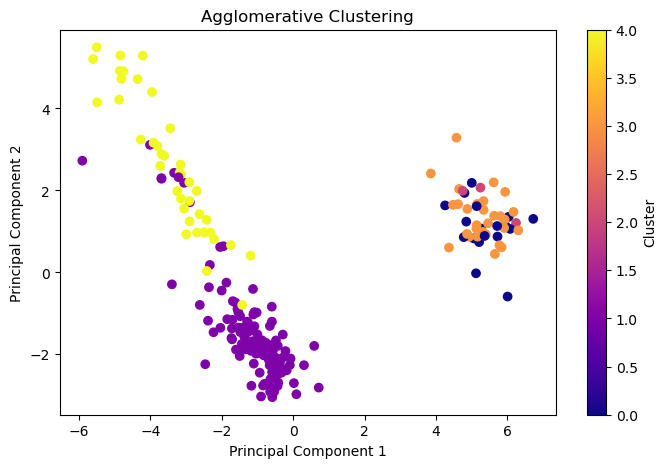

In [3]:
scaler=StandardScaler()
scaled=scaler.fit_transform(record)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_cluster.fit_predict(record)
plt.figure(figsize=(8, 5))
plt.scatter(components[:, 0], components[:, 1], c=agg_labels, cmap='plasma')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\npeno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

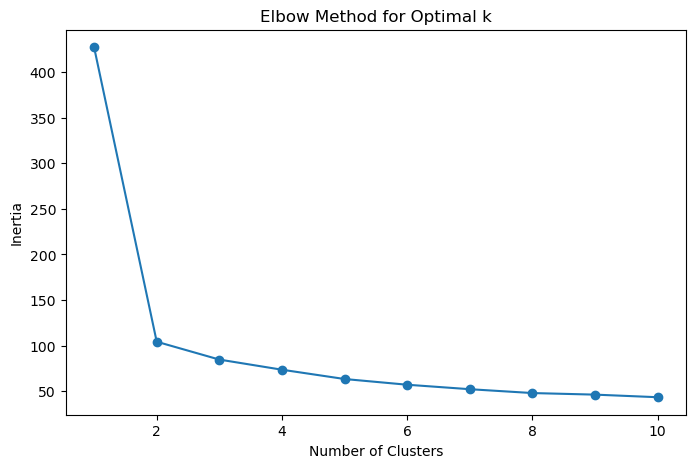

In [4]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(record)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

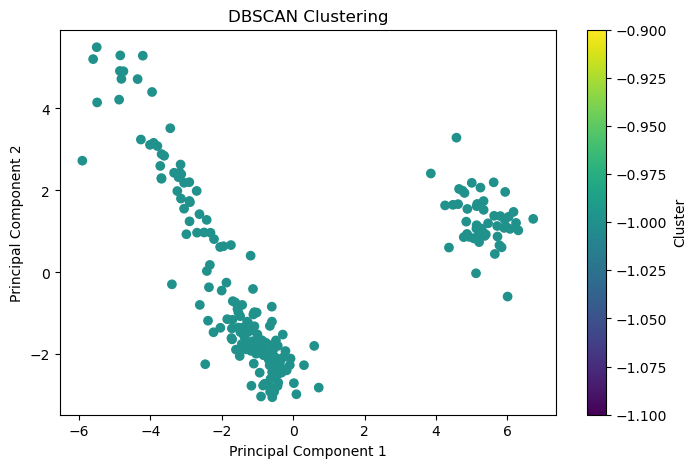

In [5]:
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(scaled)
plt.figure(figsize=(8, 5))
plt.scatter(components[:, 0], components[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Results

It seems that hierarchical clustering had the most meaningful results. I think there are a lot of connections to be made in my data because it is based on years and states. Obviously some years there will be higher percent changes overall, and states close to each other most likely move in similar directions.

# Conclusion

It is difficult to conclude much from this analysis as clustering does not apply too much to my project.